In [109]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

In [111]:
# Want to see the entire dataset
pd.set_option('display.max_rows', 10000)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 10000)

In [113]:
df = pd.read_csv('breast-cancer-dataset.csv')
df

,S/N,Year,Age,Menopause,Tumor Size (cm),Inv-Nodes,Breast,Metastasis,Breast Quadrant,History,Diagnosis Result
0,1,2019,40,1,2,0,Right,0,Upper inner,0,Benign
1,2,2019,39,1,2,0,Left,0,Upper outer,0,Benign
2,3,2019,45,0,4,0,Left,0,Lower outer,0,Benign
3,4,2019,26,1,3,0,Left,0,Lower inner,1,Benign
4,5,2019,21,1,1,0,Right,0,Upper outer,1,Benign
5,6,2019,50,0,5,1,Right,1,Lower outer,0,Malignant
6,7,2019,58,0,6,1,Right,1,Upper outer,0,Malignant
7,8,2019,21,1,3,0,Left,0,Upper inner,0,Benign
8,9,2019,35,1,4,0,Left,0,Upper outer,0,Benign
9,10,2019,42,1,2,0,Right,0,Lower outer,1,Benign


In [115]:
# See the first two records of the dataset
df.head(2)

,S/N,Year,Age,Menopause,Tumor Size (cm),Inv-Nodes,Breast,Metastasis,Breast Quadrant,History,Diagnosis Result
0,1,2019,40,1,2,0,Right,0,Upper inner,0,Benign
1,2,2019,39,1,2,0,Left,0,Upper outer,0,Benign


In [117]:
# Pre-prunning
# We have to drop certain variables basis on non-significant
df.drop(['S/N'], inplace = True, axis = 1)

In [119]:
df.drop(['Breast Quadrant'], inplace = True, axis = 1)

In [121]:
df.head(1)

,Year,Age,Menopause,Tumor Size (cm),Inv-Nodes,Breast,Metastasis,History,Diagnosis Result
0,2019,40,1,2,0,Right,0,0,Benign


In [123]:
# See the missing values
df.isnull().sum()/len(df)*100

Year                0.0
Age                 0.0
Menopause           0.0
Tumor Size (cm)     0.0
Inv-Nodes           0.0
Breast              0.0
Metastasis          0.0
History             0.0
Diagnosis Result    0.0
dtype: float64

In [125]:
# Check the datatype of the variables 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213 entries, 0 to 212
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Year              213 non-null    object
 1   Age               213 non-null    int64 
 2   Menopause         213 non-null    int64 
 3   Tumor Size (cm)   213 non-null    object
 4   Inv-Nodes         213 non-null    object
 5   Breast            213 non-null    object
 6   Metastasis        213 non-null    object
 7   History           213 non-null    object
 8   Diagnosis Result  213 non-null    object
dtypes: int64(2), object(7)
memory usage: 15.1+ KB


In [127]:
# See the value count
df['Year'].value_counts()

Year
2020    111
2019    101
#         1
Name: count, dtype: int64

In [129]:
# Put the nan value where we have '#'
df['Year'] = np.where(df['Year'] == '#', np.nan, df['Year'])

In [131]:
# Convert the datatype of the variable 
df['Year'] = pd.to_numeric(df['Year'])

In [133]:
# See the value count
df['Tumor Size (cm)'].value_counts()

Tumor Size (cm)
3     34
2     32
4     32
1     29
5     27
6     17
7     14
8     11
10     7
9      7
#      1
14     1
12     1
Name: count, dtype: int64

In [135]:
# Put the nan value where we have '#'
df['Tumor Size (cm)'] = np.where(df['Tumor Size (cm)'] == '#', np.nan, df['Tumor Size (cm)'])                                 

In [137]:
# Convert the datatype of the variable 
df['Tumor Size (cm)'] = pd.to_numeric(df['Tumor Size (cm)'])

In [139]:
# See the value count
df['Inv-Nodes'].value_counts()

Inv-Nodes
0    139
1     72
#      1
3      1
Name: count, dtype: int64

In [141]:
# Put the nan value where we have '#'
df['Inv-Nodes'] = np.where(df['Inv-Nodes'] == '#', np.nan, df['Inv-Nodes'])

In [143]:
# Convert the datatype of the variable 
df['Inv-Nodes'] = pd.to_numeric(df['Inv-Nodes'])

In [145]:
# See the value count
df['Breast'].value_counts()

Breast
Left     107
Right    100
#          6
Name: count, dtype: int64

In [147]:
# Put the mode value of the breast variable where we have '#'
df['Breast'] = np.where(df['Breast'] == '#', 'Left',df['Breast'])

In [149]:
# See the value count
df['Metastasis'].value_counts()

Metastasis
0    139
1     73
#      1
Name: count, dtype: int64

In [151]:
# Put the nan value where we have '#'
df['Metastasis'] = np.where(df['Metastasis'] == '#', np.nan, df['Metastasis'])

In [153]:
# Convert the datatype of the variable 
df['Metastasis'] = pd.to_numeric(df['Metastasis'])

In [155]:
# See the value count
df['History'].value_counts()

History
0    124
1     87
#      2
Name: count, dtype: int64

In [157]:
# Put the nan value where we have '#'
df['History'] = np.where(df['History'] == '#', np.nan, df['History'])

In [159]:
# Convert the datatype of the variable 
df['History'] = pd.to_numeric(df['History'])

In [161]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213 entries, 0 to 212
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Year              212 non-null    float64
 1   Age               213 non-null    int64  
 2   Menopause         213 non-null    int64  
 3   Tumor Size (cm)   212 non-null    float64
 4   Inv-Nodes         212 non-null    float64
 5   Breast            213 non-null    object 
 6   Metastasis        212 non-null    float64
 7   History           211 non-null    float64
 8   Diagnosis Result  213 non-null    object 
dtypes: float64(5), int64(2), object(2)
memory usage: 15.1+ KB


In [163]:
# To see the mean, standar deviation, count, q1, q2, q3, min and max values of the variables 
df.describe()

,Year,Age,Menopause,Tumor Size (cm),Inv-Nodes,Metastasis,History
count,212.000000,213.000000,213.000000,212.000000,212.000000,212.000000,211.000000
mean,2019.523585,39.784038,0.666667,4.268868,0.353774,0.344340,0.412322
std,0.500626,14.096712,0.472515,2.571881,0.508072,0.476277,0.493423
min,2019.000000,13.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,2019.000000,30.000000,0.000000,2.000000,0.000000,0.000000,0.000000
50%,2020.000000,40.000000,1.000000,4.000000,0.000000,0.000000,0.000000
75%,2020.000000,49.000000,1.000000,6.000000,1.000000,1.000000,1.000000
max,2020.000000,77.000000,1.000000,14.000000,3.000000,1.000000,1.000000


In [165]:
# Fill the nan value with the mean
df['Year'] = df['Year'].fillna(df['Year'].mean())
df['Tumor Size (cm)'] = df['Tumor Size (cm)'].fillna(df['Tumor Size (cm)'].mean())
df['Inv-Nodes'] = df['Inv-Nodes'].fillna(df['Inv-Nodes'].mean())
df['Metastasis'] = df['Metastasis'].fillna(df['Metastasis'].mean())
df['History'] = df['History'].fillna(df['History'].mean())

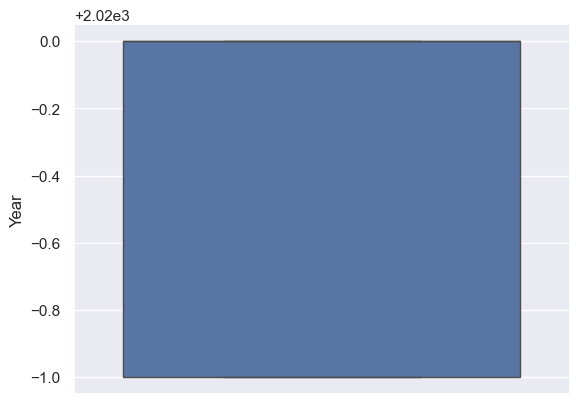

In [167]:
# Make the box plot of 'Year' to see the outlier
sns.boxplot(y = 'Year', data = df)
plt.show()

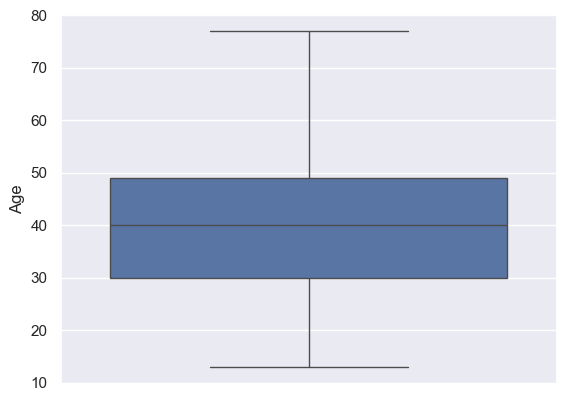

In [169]:
# Make the box plot of 'Age' to see the outlier
sns.boxplot(y = 'Age', data = df)
plt.show()

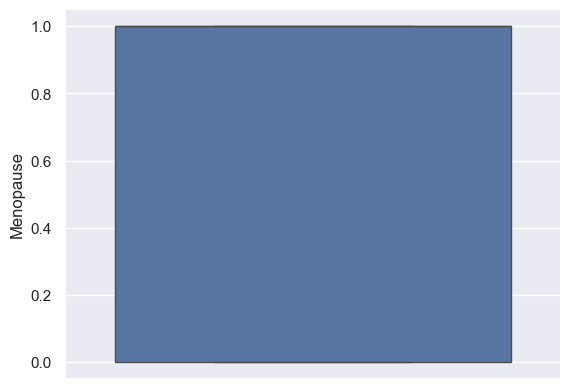

In [171]:
# Make the box plot of 'Menopause' to see the outlier
sns.boxplot(y = 'Menopause', data = df)
plt.show()

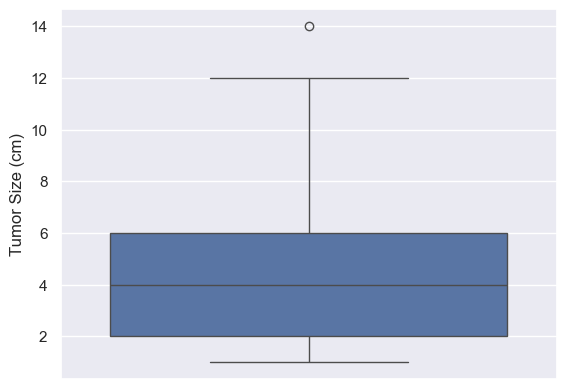

In [173]:
# Make the box plot of 'Tumor Size (cm)' to see the outlier
sns.boxplot(y = 'Tumor Size (cm)', data = df)
plt.show()

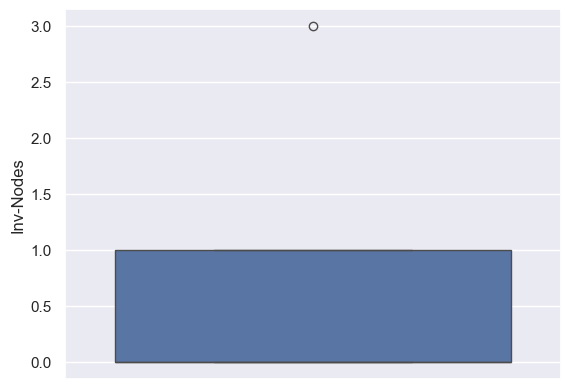

In [175]:
# Make the box plot of 'Inv-Nodes' to see the outlier
sns.boxplot(y = 'Inv-Nodes', data = df)
plt.show()

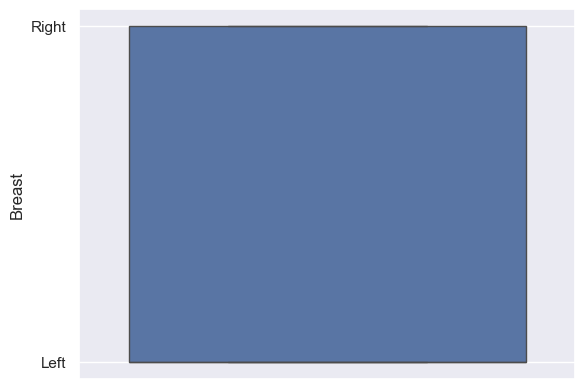

In [177]:
# Make the box plot of 'Breast' to see the outlier
sns.boxplot(y = 'Breast', data = df)
plt.show()

In [179]:
# calculate the value of q1, q3, IQR, pos_outlier and neg_outlier
numeric_columns = df.select_dtypes(include = ['number']).columns
df_numeric = df[numeric_columns]
Q1 = df_numeric.quantile(0.25)
Q3 = df_numeric.quantile(0.75)
IQR = Q3 - Q1
pos_outlier = Q3 + 1.5 * IQR
neg_outlier = Q1 - 1.5 * IQR

In [181]:
# Print the value of q1, q3, IQR, pos_outlier and neg_outlier
print(Q1)
print('********************')
print(Q3)
print('********************')
print(IQR)
print('********************')
print(pos_outlier)
print('********************')
print(neg_outlier)

Year               2019.0
Age                  30.0
Menopause             0.0
Tumor Size (cm)       2.0
Inv-Nodes             0.0
Metastasis            0.0
History               0.0
Name: 0.25, dtype: float64
********************
Year               2020.0
Age                  49.0
Menopause             1.0
Tumor Size (cm)       6.0
Inv-Nodes             1.0
Metastasis            1.0
History               1.0
Name: 0.75, dtype: float64
********************
Year                1.0
Age                19.0
Menopause           1.0
Tumor Size (cm)     4.0
Inv-Nodes           1.0
Metastasis          1.0
History             1.0
dtype: float64
********************
Year               2021.5
Age                  77.5
Menopause             2.5
Tumor Size (cm)      12.0
Inv-Nodes             2.5
Metastasis            2.5
History               2.5
dtype: float64
********************
Year               2017.5
Age                   1.5
Menopause            -1.5
Tumor Size (cm)      -4.0
Inv-Nodes     

In [183]:
# Handling the outlier
filtered_data = df[~((df_numeric < neg_outlier) | (df_numeric > pos_outlier)).any(axis=1)]
df_filtered = pd.concat([filtered_data], axis=1).loc[filtered_data.index]

# Update DataFrame
df = df_filtered

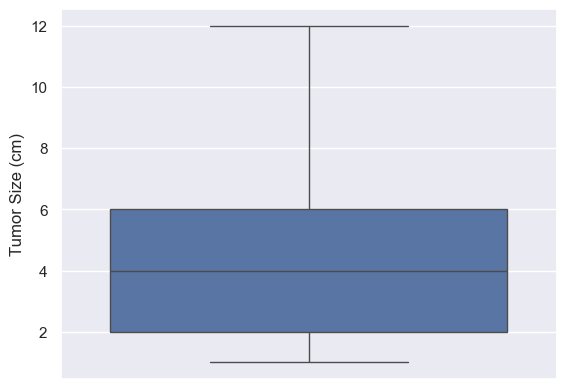

In [185]:
# Make the box plot of 'Tumor Size (cm)' to see the outlier after handeled it 
sns.boxplot(y = 'Tumor Size (cm)', data = df)
plt.show()

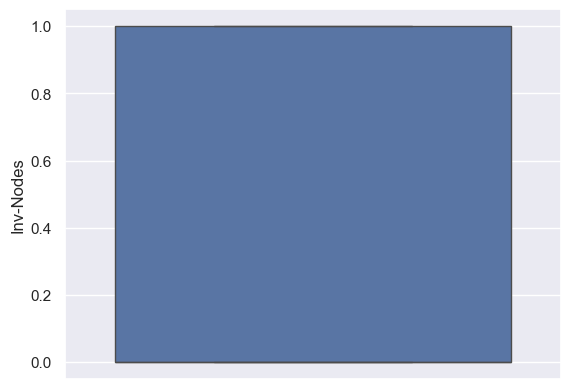

In [187]:
# Make the box plot of 'Inv-Nodes' to see the outlier after handeled it 
sns.boxplot(y = 'Inv-Nodes', data = df)
plt.show()

In [189]:
# Change the type of the variable to category
df['Diagnosis Result'] = df['Diagnosis Result'].astype('category')
df['Diagnosis Result'] = df['Diagnosis Result'].cat.codes

In [191]:
# Change the type of the variable to category
df['Breast'] = df['Breast'].astype('category')
df['Breast'] = df['Breast'].cat.codes

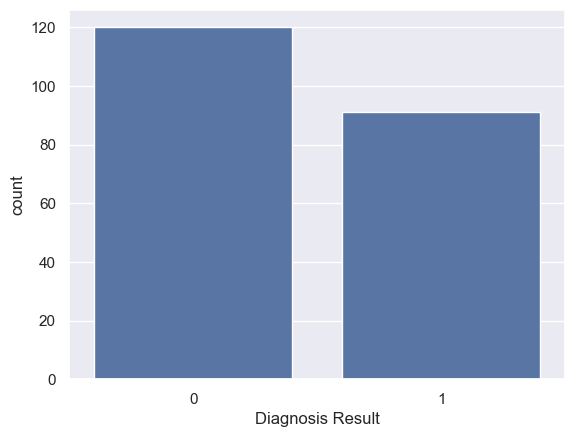

In [193]:
# Make the countplot of result 
sns.countplot(data = df, x = 'Diagnosis Result')
A, B = df['Diagnosis Result'].value_counts()
plt.show()

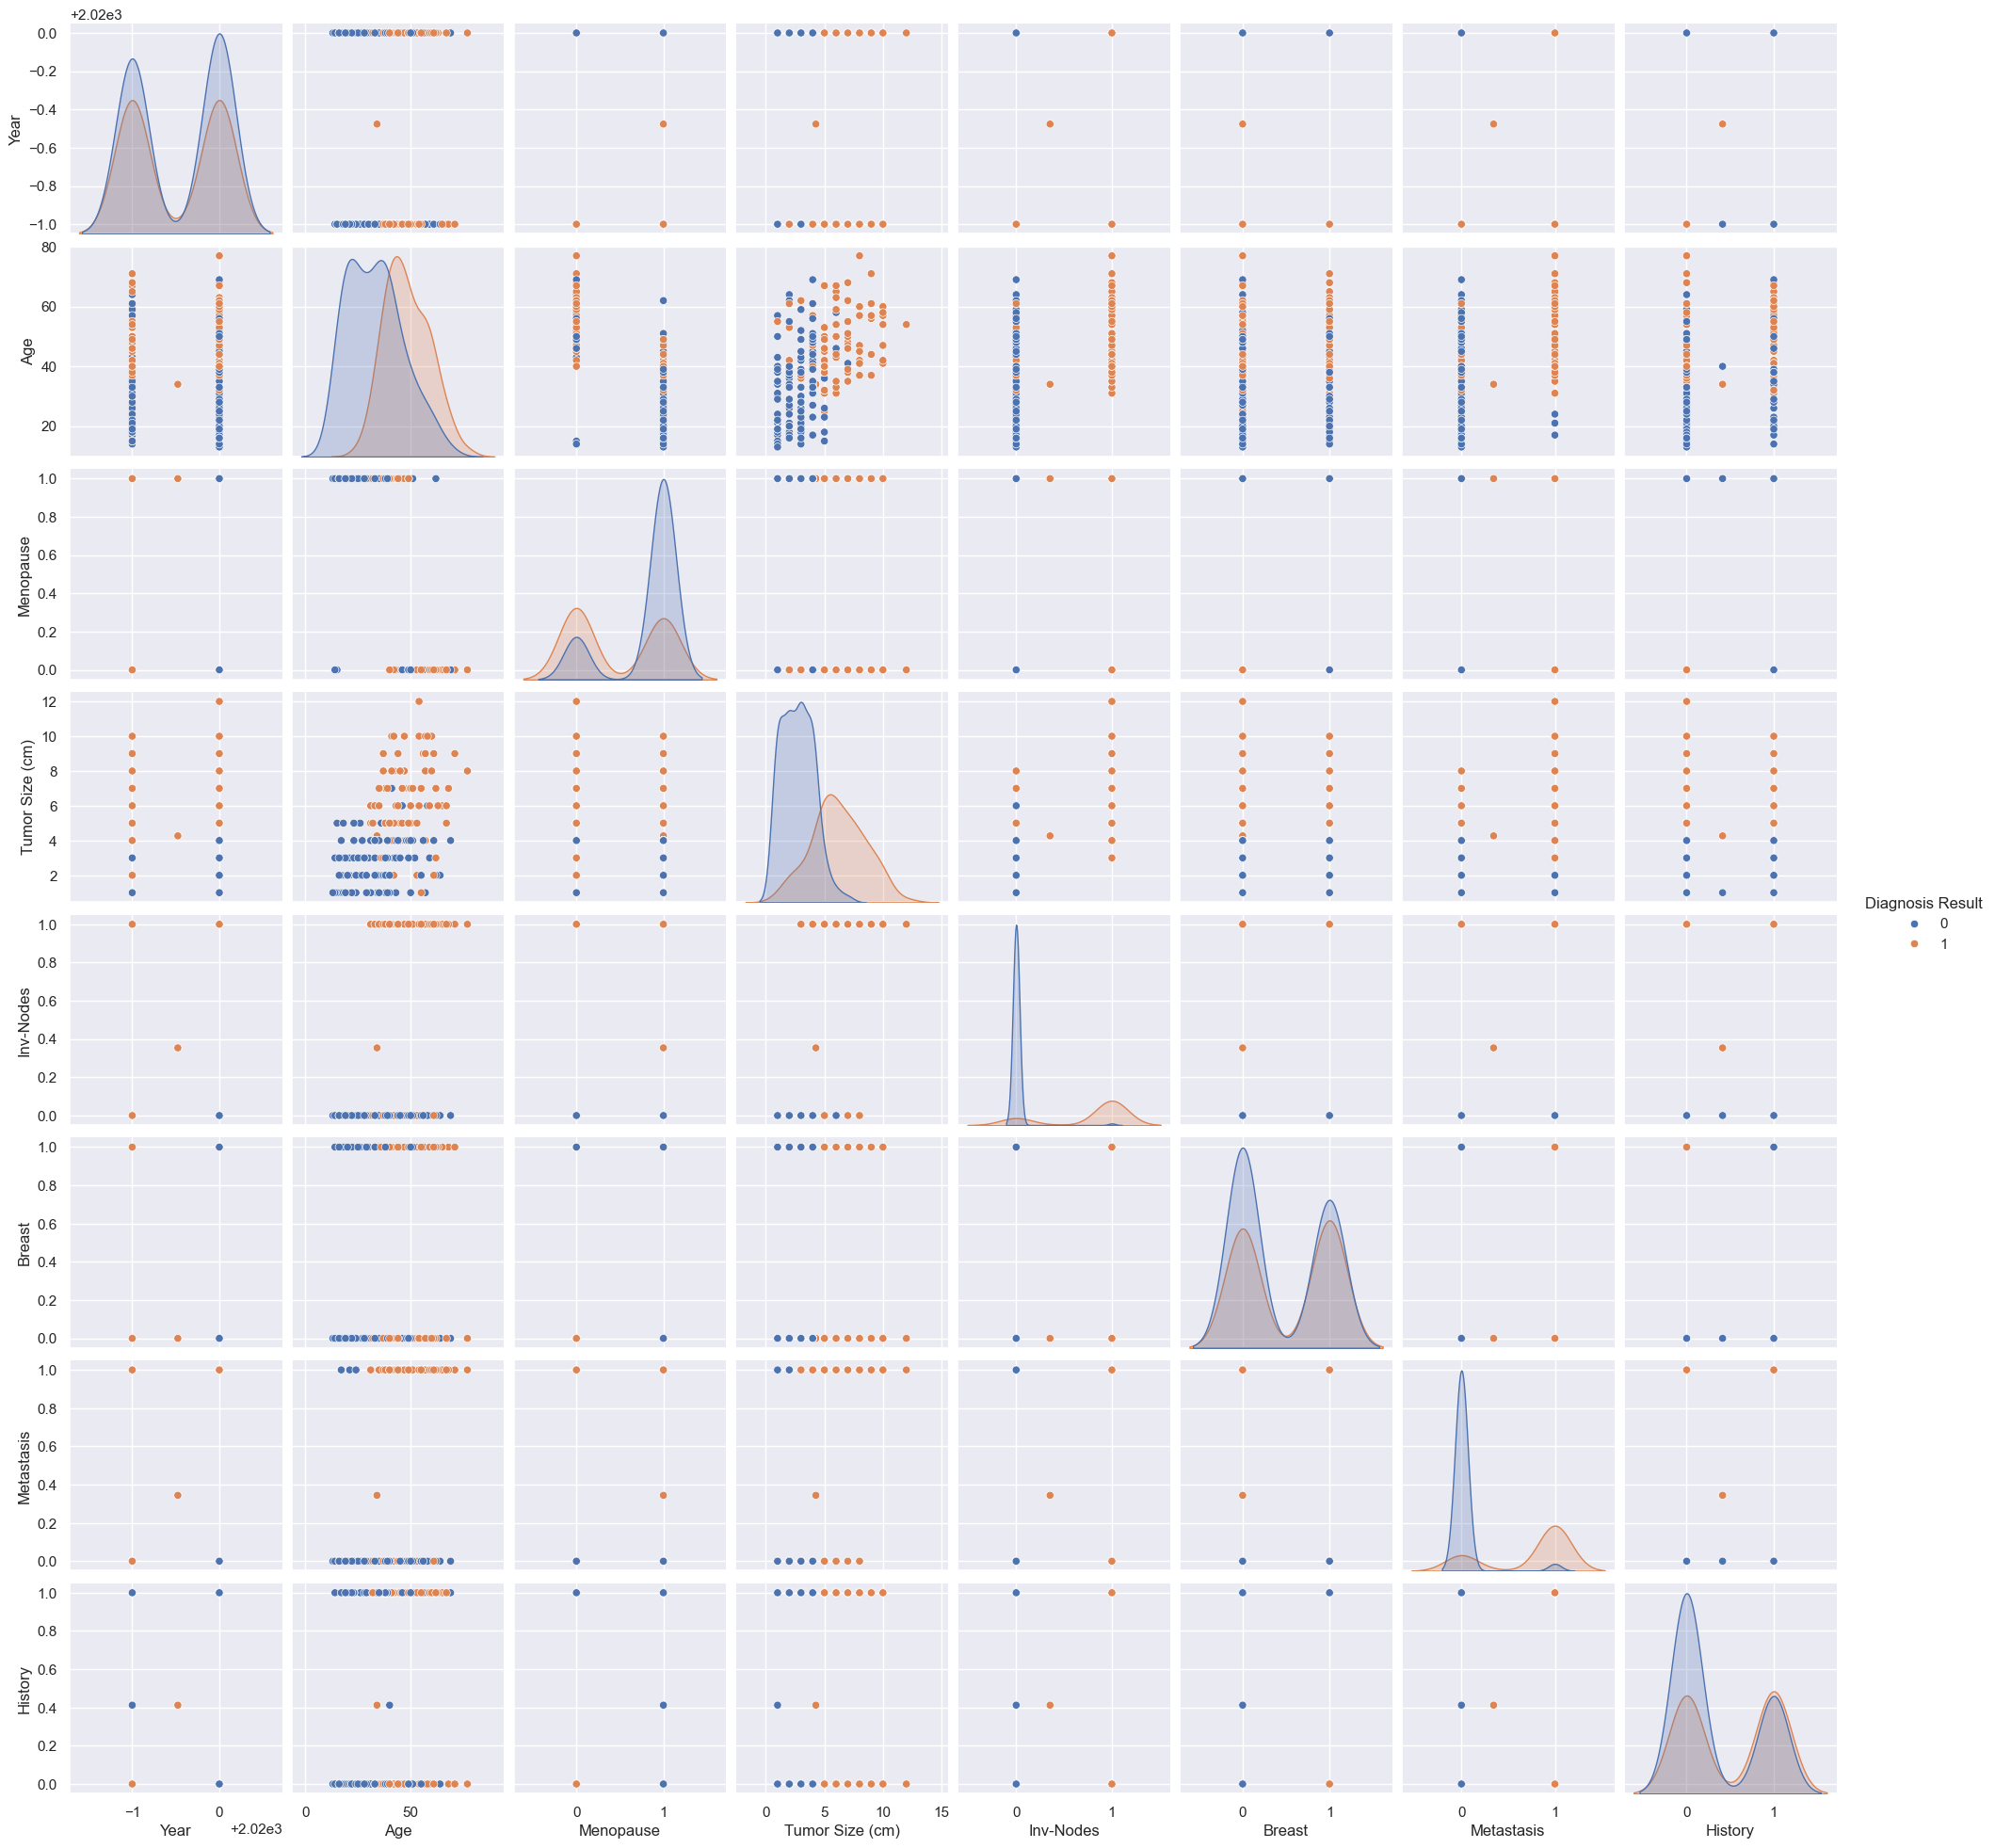

In [195]:
# Make the pairplot of each variable except Diagnosis Result
sns.pairplot(data = df, hue = 'Diagnosis Result')
plt.show()

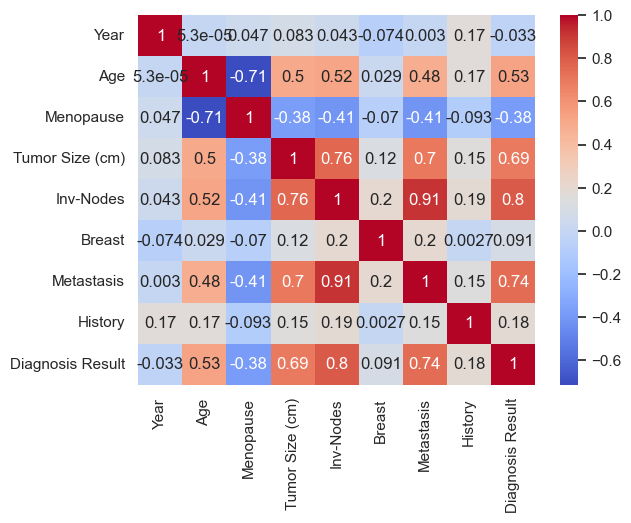

In [196]:
# Make the heatmap to see the dependency
sns.heatmap(df.corr(), annot = True, cmap = 'coolwarm')
plt.show()

In [199]:
df.head(2)

,Year,Age,Menopause,Tumor Size (cm),Inv-Nodes,Breast,Metastasis,History,Diagnosis Result
0,2019.0,40,1,2.0,0.0,1,0.0,0.0,0
1,2019.0,39,1,2.0,0.0,0,0.0,0.0,0


In [223]:
# Split the data to independent and dependent variable
x = df[['Year', 'Age', 'Menopause', 'Tumor Size (cm)', 'Inv-Nodes', 'Breast', 'Metastasis', 'History']]
y = df[['Diagnosis Result']]

In [225]:
# Check the first five record of independent variables
x.head()

,Year,Age,Menopause,Tumor Size (cm),Inv-Nodes,Breast,Metastasis,History
0,2019.0,40,1,2.0,0.0,1,0.0,0.0
1,2019.0,39,1,2.0,0.0,0,0.0,0.0
2,2019.0,45,0,4.0,0.0,0,0.0,0.0
3,2019.0,26,1,3.0,0.0,0,0.0,1.0
4,2019.0,21,1,1.0,0.0,1,0.0,1.0


In [227]:
# Check the first five record of dependent variables
y.head()

,Diagnosis Result
0,0
1,0
2,0
3,0
4,0


In [231]:
# Split the data into train and test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 101)

In [241]:
# Make the model
from sklearn.tree import DecisionTreeClassifier
dt1 = DecisionTreeClassifier(criterion = 'gini')
dt1.fit(x_train, y_train)
dt2 = DecisionTreeClassifier(criterion = 'entropy')
dt2.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [243]:
# Predict the values by the model
y_pred_dt1_train = dt1.predict(x_train)
y_pred_dt1_test = dt1.predict(x_test)

y_pred_dt2_train = dt2.predict(x_train)
y_pred_dt2_test = dt2.predict(x_test)


In [245]:
# Import the necessary libraries to check the performance of the model
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [247]:
# Make the confusion matrix
confusion_matrix(y_test, y_pred_dt1_test)

array([[21,  0],
       [ 4, 18]], dtype=int64)

In [251]:
# To make the classification report of the train data
print(classification_report(y_train, y_pred_dt1_train))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99        99
           1       1.00      0.99      0.99        69

    accuracy                           0.99       168
   macro avg       0.99      0.99      0.99       168
weighted avg       0.99      0.99      0.99       168



In [253]:
# To make the classification report of the test data
print(classification_report(y_test, y_pred_dt1_test))

              precision    recall  f1-score   support

           0       0.84      1.00      0.91        21
           1       1.00      0.82      0.90        22

    accuracy                           0.91        43
   macro avg       0.92      0.91      0.91        43
weighted avg       0.92      0.91      0.91        43



In [257]:
# Print the accuracy of the train and test by gini index
print("Train Accuracy", accuracy_score(y_train, y_pred_dt1_train))
print("*******"*6)
print("Test Accuracy", accuracy_score(y_test, y_pred_dt1_test))

Accuracy Score 0.9940476190476191
******************************************
Accuracy Score 0.9069767441860465


In [259]:
# Print the accuracy of the train and test by entropy
print("Train Accuracy", accuracy_score(y_train, y_pred_dt2_train))
print("*******"*6)
print("Test Accuracy", accuracy_score(y_test, y_pred_dt2_test))

Accuracy Score 0.9940476190476191
******************************************
Accuracy Score 0.8837209302325582


In [269]:
# To check the importance of the variables in the result
# post_prunning
dt1.feature_importances_

array([0.0094857 , 0.11378503, 0.02572995, 0.10866478, 0.70219818,
       0.03065066, 0.        , 0.0094857 ])

In [271]:
pd.DataFrame(index = x.columns, data = dt1.feature_importances_, columns = ['Feature Importance'])

,Feature Importance
Year,0.009486
Age,0.113785
Menopause,0.025730
Tumor Size (cm),0.108665
Inv-Nodes,0.702198
Breast,0.030651
Metastasis,0.000000
History,0.009486


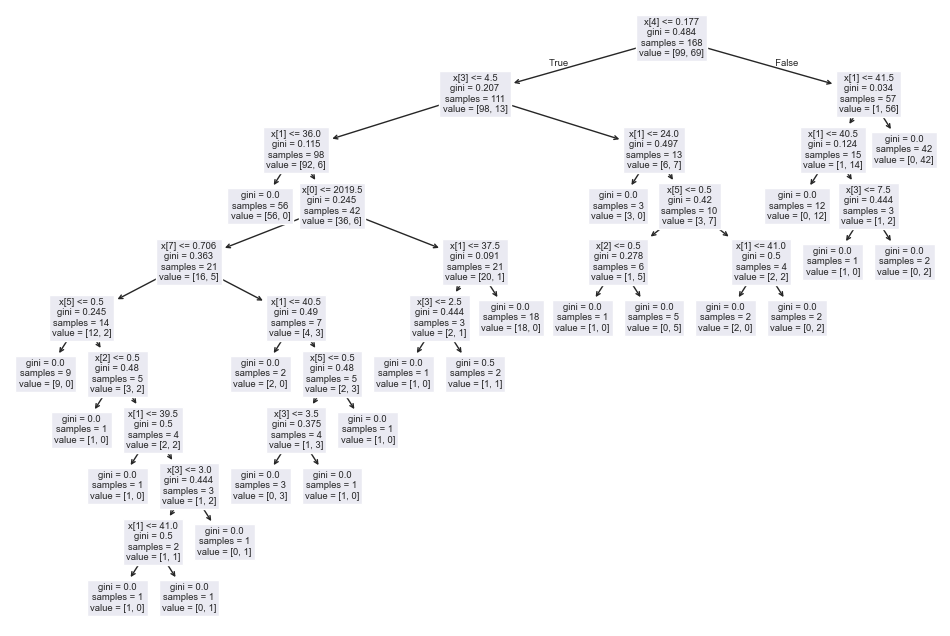

In [275]:
# Make the decision tree of the dt1 
from sklearn.tree import plot_tree
plt.figure(figsize=(12,8))
plot_tree(dt1)
plt.show()

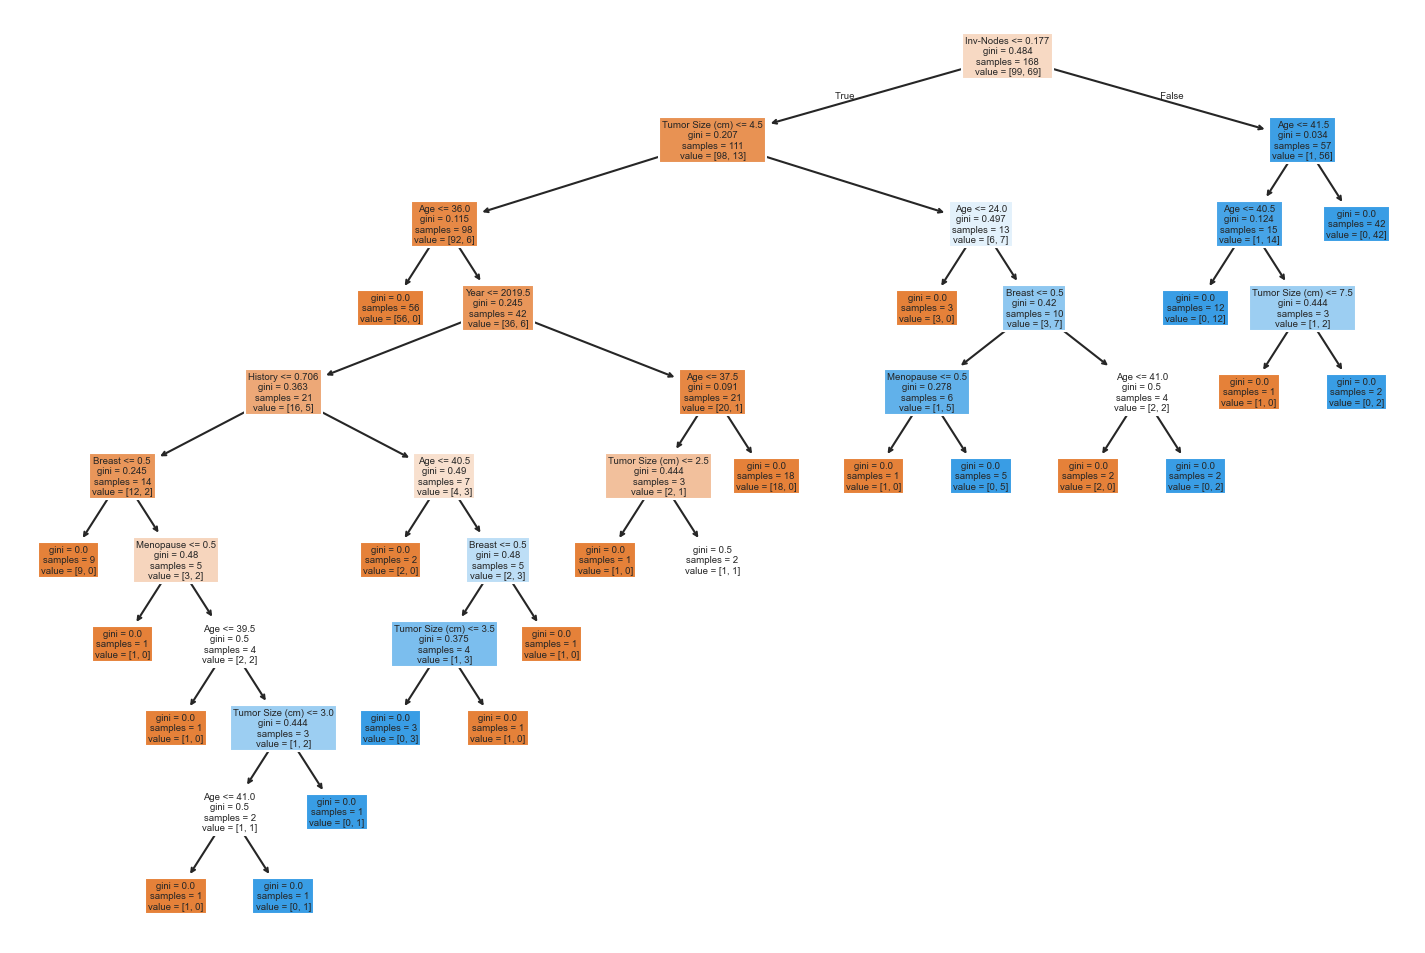

In [287]:
plt.figure(figsize=(12,8), dpi = 150)
plot_tree(dt1, feature_names = x.columns, filled = True)
plt.show()

In [333]:
#Use define function
def report_model(model):
    report_model = model.predict(x_test)
    print(classification_report(y_test, report_model))
    print("\n")
    plt.figure(figsize = (12, 8), dpi = 150)
    plot_tree(dt1, feature_names = x.columns, filled = True)
    plt.show()

In [335]:
# HyperParameter in decision tree
prunned_tree = DecisionTreeClassifier(max_depth = 2)
prunned_tree.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=2)

              precision    recall  f1-score   support

           0       0.79      0.90      0.84        21
           1       0.89      0.77      0.83        22

    accuracy                           0.84        43
   macro avg       0.84      0.84      0.84        43
weighted avg       0.84      0.84      0.84        43





<Figure size 1800x1200 with 0 Axes>

<Figure size 1800x1200 with 0 Axes>

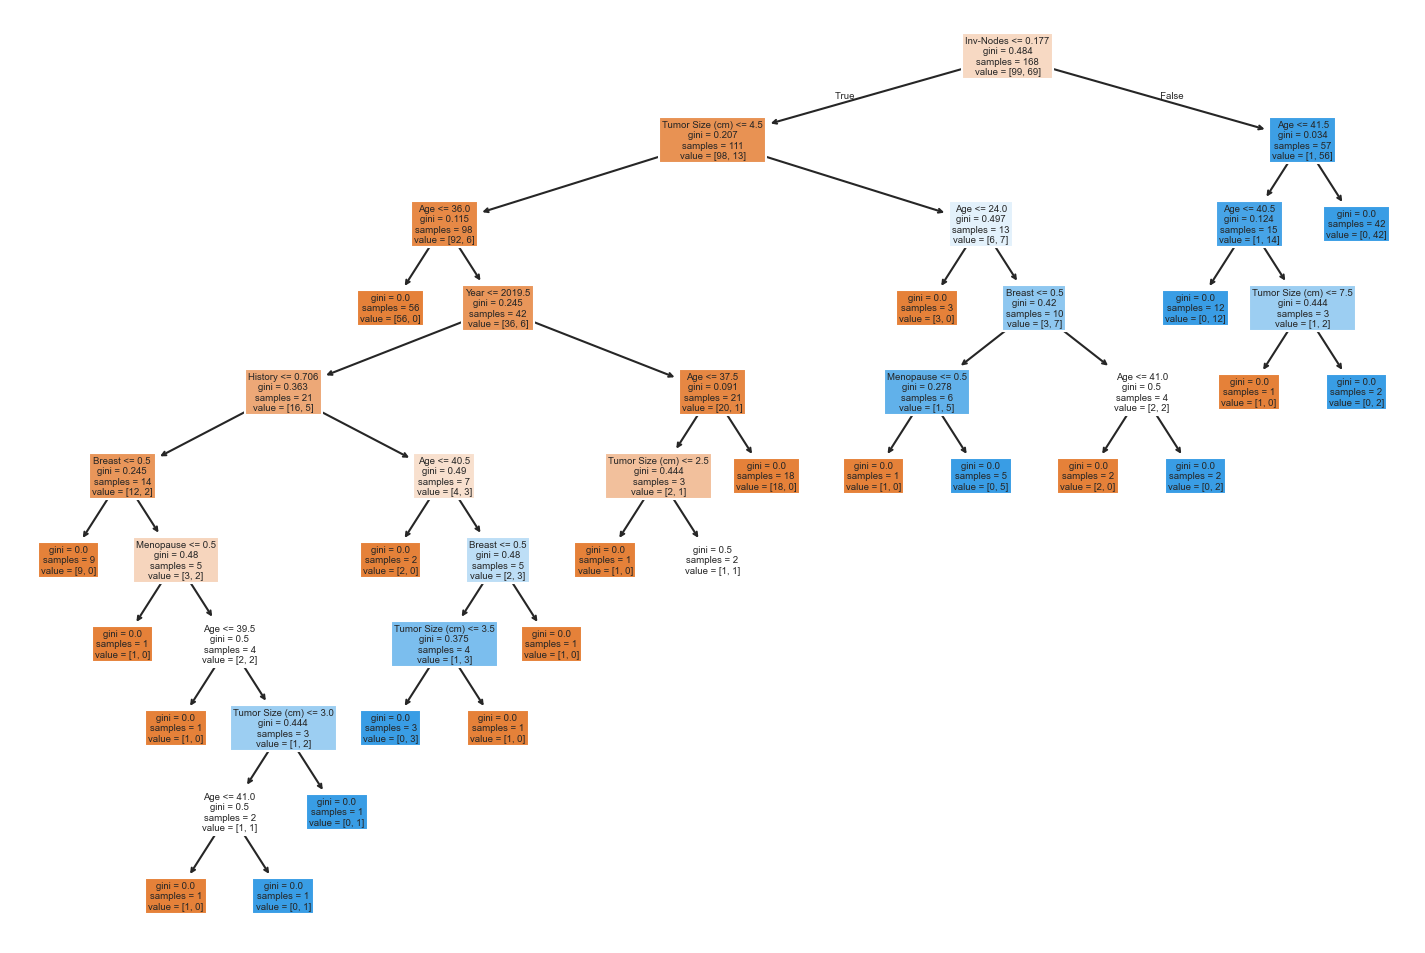

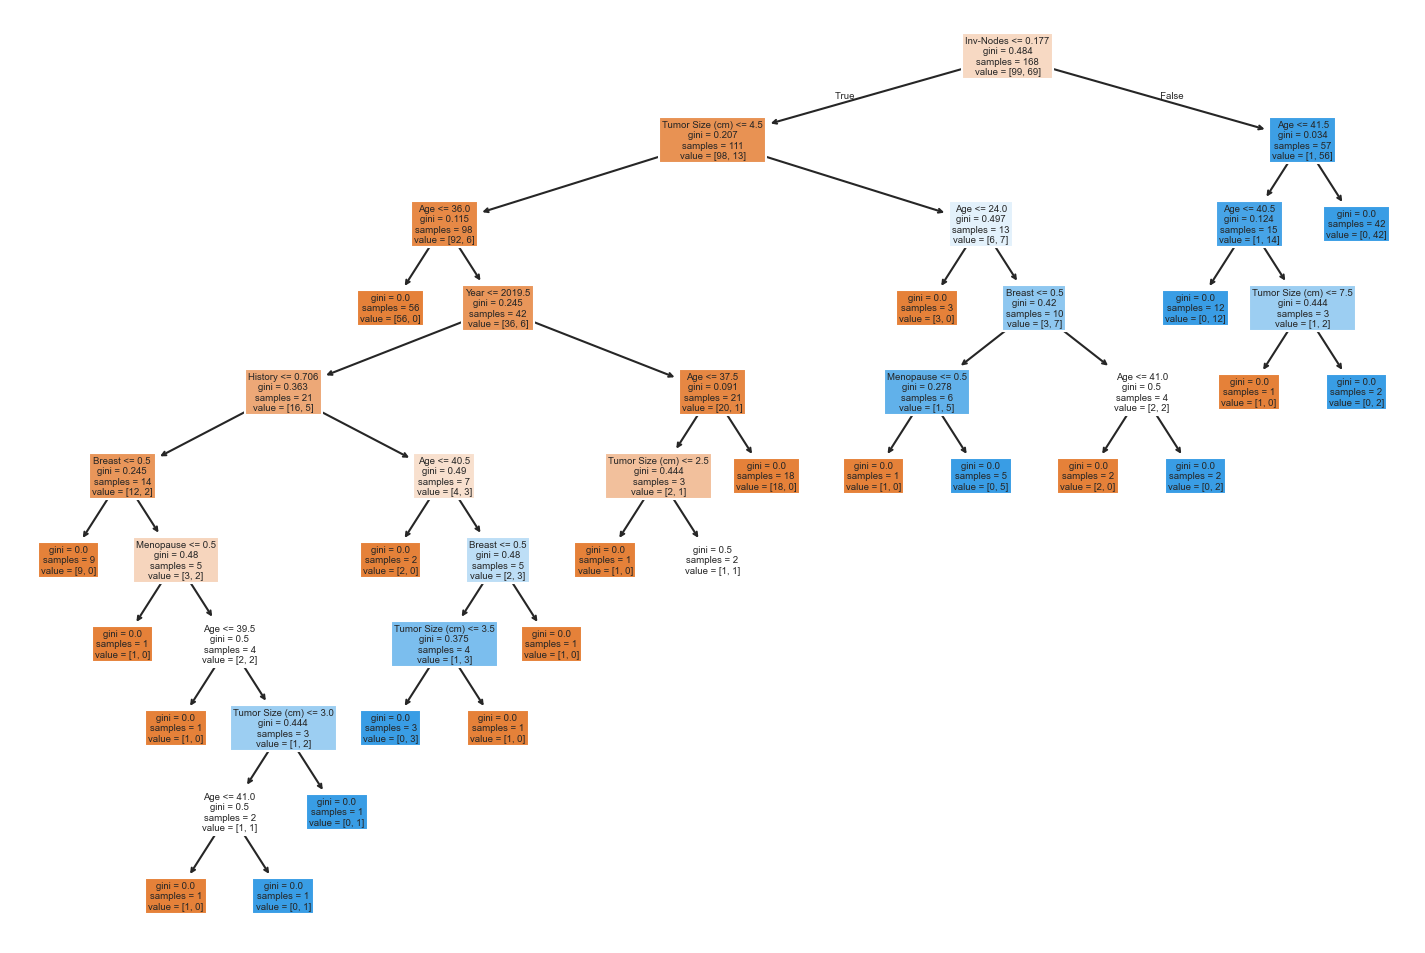

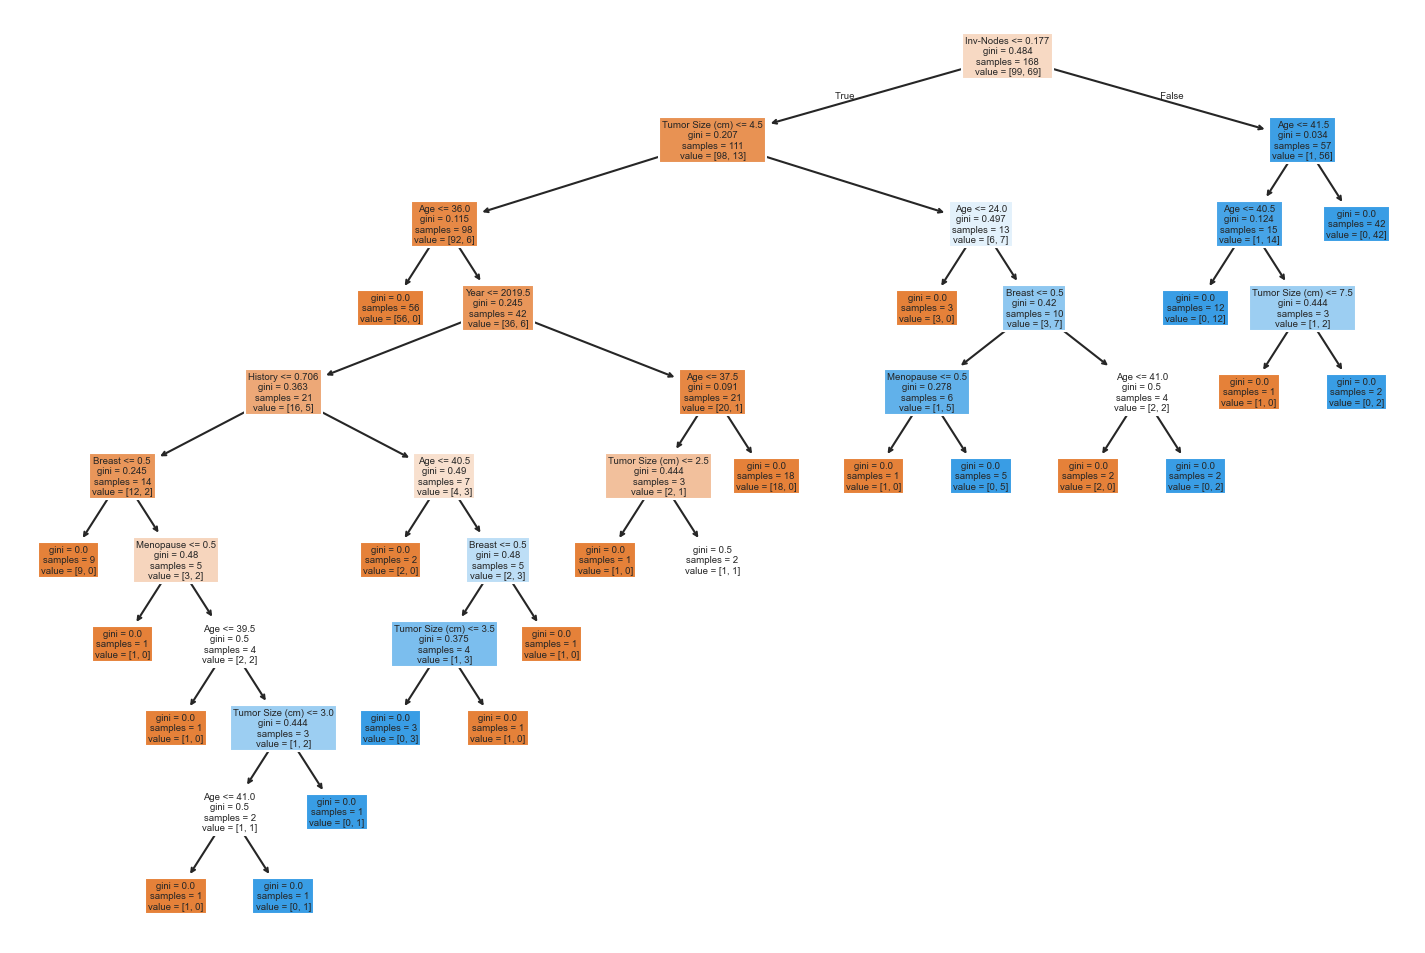

In [337]:
# Make the report of the model
report_model(prunned_tree)

In [339]:
# Predict the value with prunned tree model
y_pred_dt_train = prunned_tree.predict(x_train)
y_pred_dt_test = prunned_tree.predict(x_test)

In [343]:
# Print the train and test accuracy of the prunned tree model
print("Train Accuracy", accuracy_score(y_train, y_pred_dt_train))
print("*********"*5)
print("Test Accuracy", accuracy_score(y_test, y_pred_dt_test))

Train Accuracy 0.9226190476190477
*********************************************
Test Accuracy 0.8372093023255814


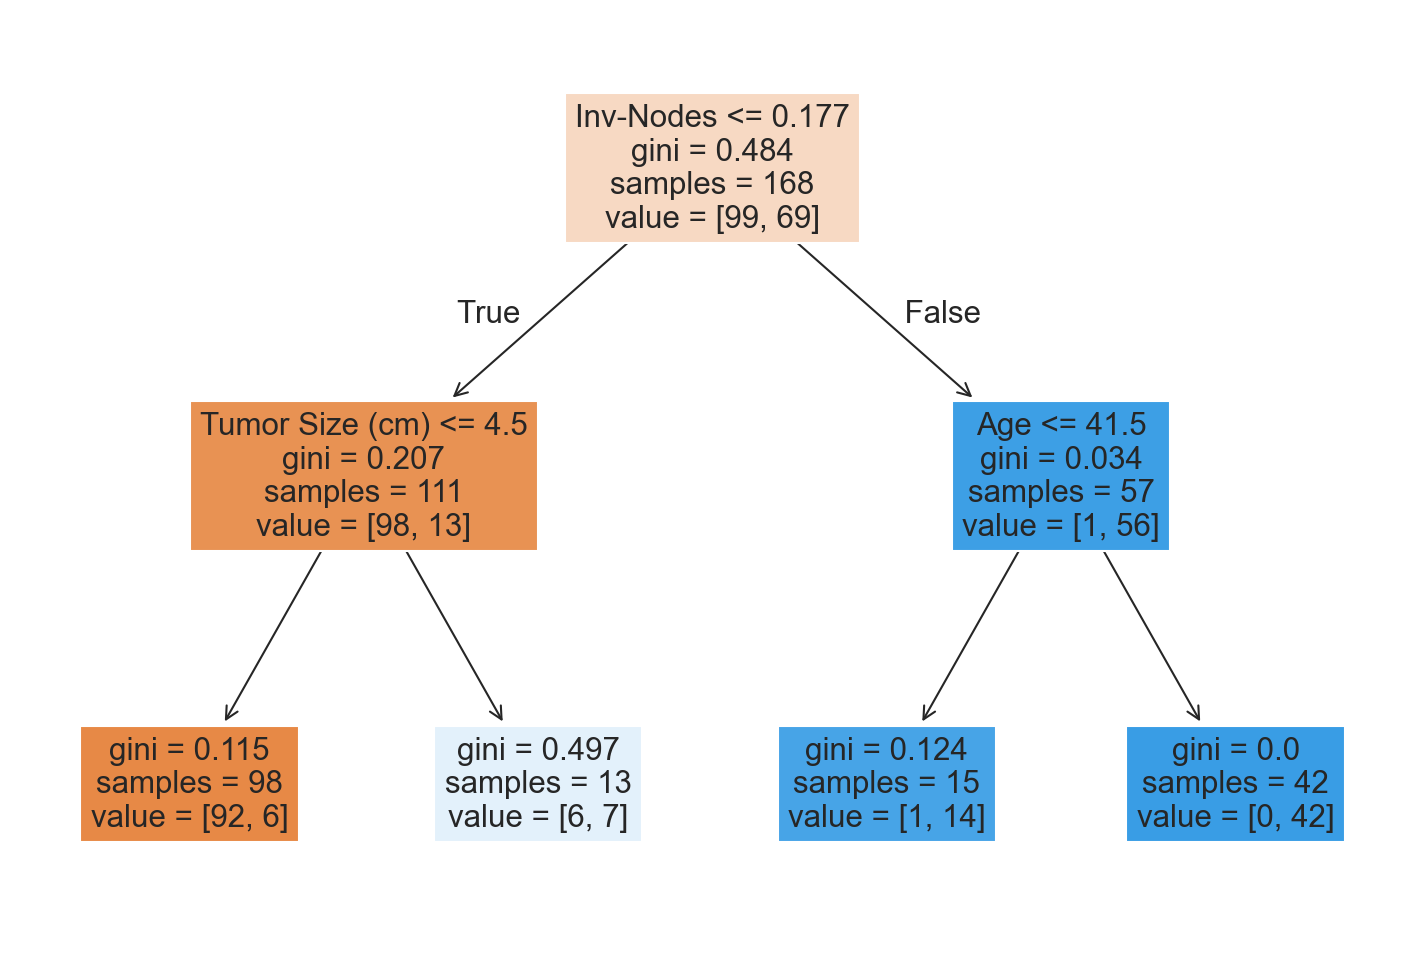

In [345]:
# Make the prunned tree 
plt.figure(figsize=(12,8), dpi = 150)
plot_tree(prunned_tree, feature_names = x.columns, filled = True)
plt.show()

In [347]:
# RandomForest and Bagging method

from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier

In [351]:
# Make the model with bagging classifier
bag = BaggingClassifier()
bag.fit(x_train, y_train)

BaggingClassifier()

In [353]:
# Predict the value with bagging classifier
y_pred_bag_train = bag.predict(x_train)
y_pred_bag_test = bag.predict(x_test)

In [359]:
# Print the train and test accuracy of the bagging model
print("Train Accuracy", accuracy_score(y_train, y_pred_bag_train))
print("******"*5)
print("Test Accuracy", accuracy_score(y_test, y_pred_bag_test))

Train Accuracy 0.9880952380952381
******************************
Test Accuracy 0.8604651162790697


In [367]:
# Make the random forest model
rf = RandomForestClassifier(n_estimators = 1000, max_depth = 2, oob_score = True)
rf.fit(x_train, y_train)


RandomForestClassifier(max_depth=2, n_estimators=1000, oob_score=True)

In [369]:
# Predict the value with random forest classifier
y_pred_rf_train = rf.predict(x_train)
y_pred_rf_test = rf.predict(x_test)

In [373]:
# Print the train and test accuracy of the random forest classifier
print("Train Accuracy", accuracy_score(y_train, y_pred_rf_train))
print("******"*5)
print("Test Accuracy", accuracy_score(y_test, y_pred_rf_test))

Train Accuracy 0.9166666666666666
******************************
Test Accuracy 0.8372093023255814
